<a href="https://colab.research.google.com/github/nrarifahmed/eda/blob/main/Heart_Attack_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://pypi.org/project/pandas-profiling/


https://pandas-profiling.github.io/pandas-profiling/docs/master/index.html


https://www.kaggle.com/mehulpatole31/heart-attack-eda-prediction

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type
  Value 0: typical angina
  Value 1: atypical angina
  Value 2: non-anginal pain
  Value 3: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results
    Value 0: normal
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [1]:
!nvidia-smi

Wed May 26 10:00:14 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv


/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv



In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive/')

Mounted at /content/drive/


### dtale EDA 

https://pypi.org/project/chart-studio/


In [4]:
!pip install chart-studio

     |████████████████████████████████| 71kB 5.1MB/s 


In [6]:
#importing essential libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import plotly.express as px
import plotly.io as pio
warnings.filterwarnings("ignore")




In [7]:
import plotly.graph_objects as go

In [9]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EDA/heart.csv')

In [20]:
df.shape

(303, 14)

In [21]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
df.shape

(303, 14)

In [22]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [25]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

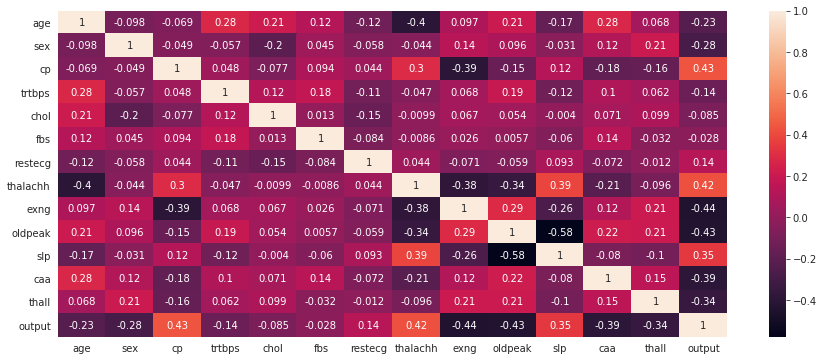

In [26]:
plt.figure(figsize= (15,6))
sns.set_style("darkgrid")
sns.heatmap(df.corr(),annot= True)
plt.show()

In [27]:
ax= px.histogram(df,x= "age", template= "plotly_dark",color= "output",title='Age distribution')
ax.show()

In [28]:
ax= px.pie(df, names= "output",template= "plotly_dark",title= "chances of heart attack",hole= 0.5)
ax.show()

In [29]:
# Chest pain types
#    Value 0: typical angina
#    Value 1: atypical angina
#    Value 2: non-anginal pain
#    Value 3: asymptomatic


ax= px.pie(df, names= "cp",template= "plotly_dark",title= " Chest pain types ",hole=.7)
ax.show()

In [30]:
ax = px.scatter(df, x="age", y="trtbps",size="trtbps", color="output",
                size_max=20,template= "plotly_dark",title="resting blood pressure/age correlation")
ax.show()

In [31]:
ax= px.scatter(df,x= "age",y= "chol",marginal_x='histogram', marginal_y='histogram',size="chol", size_max=20,
              template= "plotly_dark",color= "output",title="age and cholestrol correlation")
ax.show()

In [32]:
ax = px.scatter_3d(df, x="age", y="trtbps", z="chol",template= "plotly_dark",color="output")
ax.show()